# Ranging and Ransac

We'll use the following imports:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

If you get an error from importing sklearn, then you will have to install it using:
conda install scikit-learn

For the exercise we will be using the data taken from a lidar by a robot in a hallway. The data is saved in `laser.csv` and we can import this in Python using numpy as such:

In [2]:
laser = np.genfromtxt('laser.csv', delimiter=',')

In [11]:
print(type(laser))
print(laser.shape)

print(len(laser))

# 2 degrees

<class 'numpy.ndarray'>
(541,)
541


The file contains only a single rotation of the lidar. You can open the file in any text editor to get a look at the data. Each number in the file is the distance measured in meters. The lidar starts measuring at 135 degrees and ends at -135 degrees and it rotates the same amount between each measurement. 

## Exercise 3.1
Convert the data in the csv file to x and y coordinates in a Carthesian coordinate system and plot the result using matplotlib.

Hint: Use [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) instead of plt.plot in order to show every measurement as a point. 

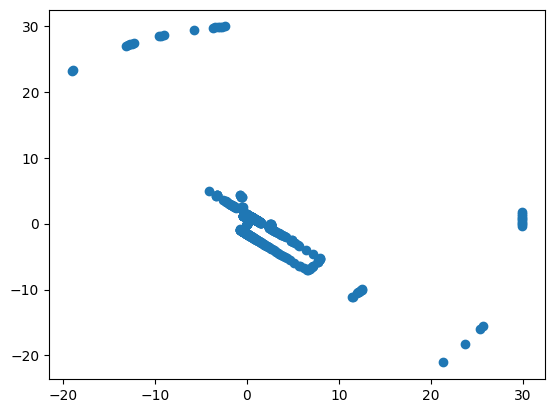

In [18]:
# Convert to x and y coordinates

angle_start = 135
angle_stop = -135


# angle_delta = (np.abs(angle_stop) + angle_start) / len(laser)

# i = 0
# for angle in np.arange(135.0, -135.0, -angle_delta):
#     x = laser[i] * np.cos(angle)
#     y = laser[i] * np.sin(angle)
#     i += 1

angle_delta = (np.abs(angle_stop) + angle_start) / len(laser)

# Generate angle array using np.arange
angles = np.arange(angle_start, angle_stop, -angle_delta)

# Convert to radians
angles_radians = np.radians(angles)

# Vectorized calculation of x and y coordinates
x_coords = laser * np.cos(angles_radians)
y_coords = laser * np.sin(angles_radians)


plt.scatter(x_coords,y_coords)

## Exercise 3.2

We would like to locate one of the walls in the dataset. To do so we will use [Ransac](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html) to fine the best line fit in the noisy data. A Ransac regressor is initialized the following way using sklearn:

In [4]:
ransac = linear_model.RANSACRegressor()

Now that we have our Ransac regressor we can fit it to a dataset (x,y):

In [20]:
# Fit data

x_coords_reshaped = x_coords.reshape(-1, 1)

ransac.fit(x_coords_reshaped, y_coords)

RANSACRegressor()

Finally, to get the fitted line we can use the predict function. As an argument this takes the x values in which the line will be predicted:

In [21]:
# Predict line
y_ransac = ransac.predict(x_coords_reshaped)

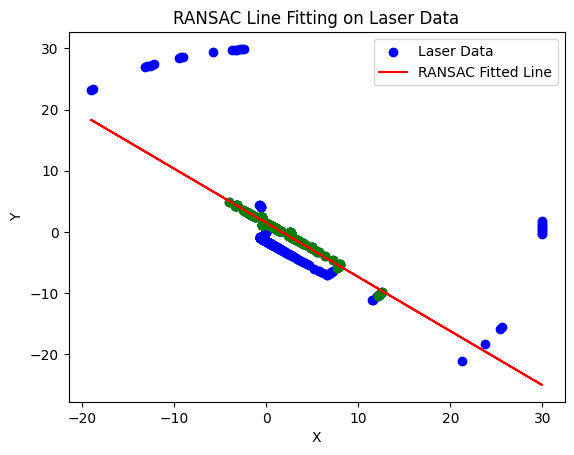

In [25]:
plt.scatter(x_coords, y_coords, label='Laser Data', color='blue')
plt.plot(x_coords, y_ransac, color='red', label='RANSAC Fitted Line')
plt.scatter(x_coords_reshaped[ransac.inlier_mask_], y_coords[ransac.inlier_mask_], color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('RANSAC Line Fitting on Laser Data')
plt.legend()
plt.show()

Plot the line on top of the scatterplot from before to see the fit.

## Exercise 3.3

To see which data points were used to make the line fit and which were deemed outliers, we can use the function ransac.inlier_mask_

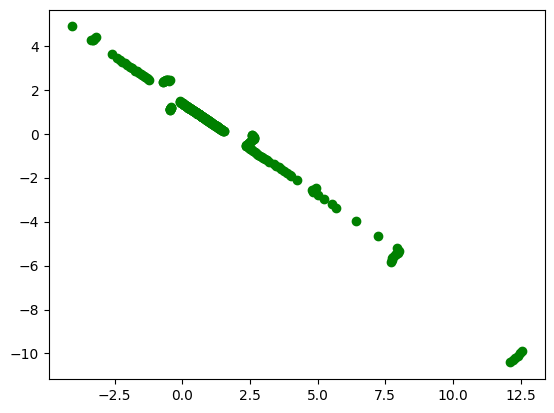

In [24]:
plt.scatter(x_coords_reshaped[ransac.inlier_mask_], y_coords[ransac.inlier_mask_], color='green')

In [27]:
ransac_outlier = ~ransac.inlier_mask_

Find the second hallway wall using another Ransac fit and plot it together with the data points and the first ransac fit.

Hint: Use the outliers from the first Ransac.

In [28]:
ransac2 = linear_model.RANSACRegressor()

ransac2.fit(x_coords_reshaped[ransac_outlier], y_coords[ransac_outlier])

y_ransac_2 = ransac2.predict(x_coords_reshaped[ransac_outlier])

# Find the second hallway wall

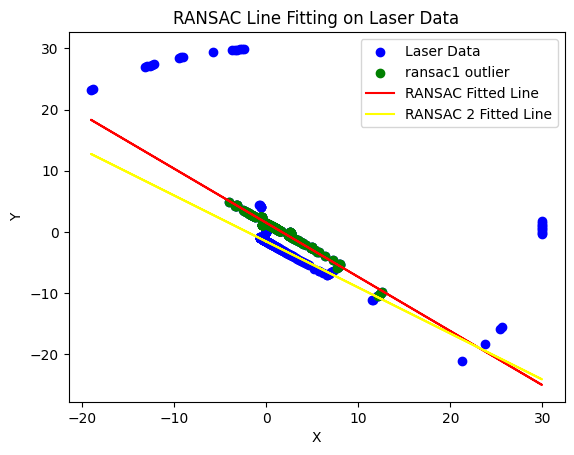

In [33]:
plt.scatter(x_coords, y_coords, label='Laser Data', color='blue')
plt.scatter(x_coords_reshaped[ransac.inlier_mask_], y_coords[ransac.inlier_mask_], color='green', label='ransac1 outlier')
plt.plot(x_coords, y_ransac, color='red', label='RANSAC Fitted Line')
plt.plot(x_coords_reshaped[ransac_outlier], y_ransac_2, color='yellow', label='RANSAC 2 Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('RANSAC Line Fitting on Laser Data')
plt.legend()
plt.show()